In [1]:
%pylab inline

/home/gjones/miniconda2/envs/readout/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout import *

/home/gjones/miniconda2/envs/readout/lib/python2.7/site-packages/lmfit/ui/__init__.py:33: UserWarning: lmfit.Fitter will use basic mode, not IPython: need ipywidgets.
  warnings.warn(_ipy_msg3)


In [3]:
ri = r2heterodyne.Roach2Heterodyne(adc_valon='/dev/ttyUSB4',lo_valon=None)

Loaded ROACH state from /data/readout/r2kid_config.npz
ROACH configuration does not match saved state
Reinitializing system
Deprogramming
Programming r2iq2xpfb14mcr12gb_2016_Feb_20_0948.bof
Requested sampling rate 512.0 MHz. Estimated sampling rate 513.1 MHz
--- === Trying with OUT DELAYS to 30 === ---
Eye for QDR qdr0 (0 is pass, 1 is fail):
	Tap step  0:  11111111111111111111110111111101
	Tap step  1:  11111111111111110100000101010101
	Tap step  2:  11111111111111010000000100000000
	Tap step  3:  11111011111111000000000000000000
	Tap step  4:  01000001000001000000000000000000
	Tap step  5:  00000000000000000000000000000000
	Tap step  6:  00000000000000000000000000000000
	Tap step  7:  00000000000000000000000000000000
	Tap step  8:  00000000000000000000000000000000
	Tap step  9:  00000000000000000000000000000000
	Tap step 10:  00000000000000000000000000000000
	Tap step 11:  00000000000000000000000000000000
	Tap step 12:  00000000000000000000000000000000
	Tap step 13:  0000000000000000

In [4]:
ri.set_lo(1000.)

In [5]:
from kid_readout.measurement.acquire import acquire

In [6]:
ri.set_loopback(True)

In [7]:
ri.loopback

True

In [8]:
ri.set_fft_gain(0)

In [30]:
sa = acquire.run_sweep(ri,np.linspace(900,900.1,16)[:,None],length_seconds=1,num_tone_samples=2**17)

In [31]:
sa.frequency_MHz_stack

array([ 900.        ,  900.0078125 ,  900.01171875,  900.01953125,
        900.02734375,  900.03515625,  900.0390625 ,  900.046875  ,
        900.0546875 ,  900.05859375,  900.06640625,  900.07421875,
        900.078125  ,  900.0859375 ,  900.09375   ,  900.1015625 ])

In [11]:
from kid_readout.measurement import basic

In [32]:
swp = sa.sweep(0)

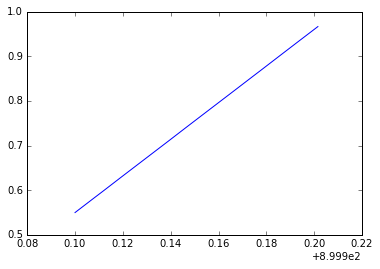

In [33]:
plot(swp.frequency_MHz_stack,np.unwrap(np.angle(swp.s21_points)))

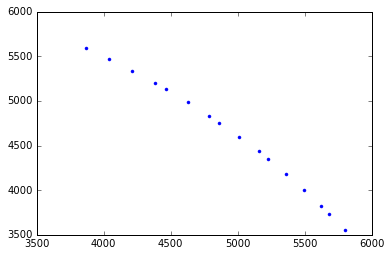

In [34]:
plot_ri(swp.s21_points,'.')

In [35]:
from kid_readout.analysis import lmfit_fitter

In [36]:
from kid_readout.analysis.resonator import lmfit_models

In [37]:
fit = lmfit_fitter.FitterWithAttributeAccess(swp.s21_points,f=swp.frequency_stack,model=lmfit_models.GeneralCableModel)

In [38]:
fit.fit()

In [39]:
fit.current_params

Parameters([('delay',
             <Parameter 'delay', -6.5298698523034229e-07, bounds=[-inf:inf]>),
            ('phi',
             <Parameter 'phi', 0.54981953510951209, bounds=[-3.141592653589793:3.141592653589793]>),
            ('f_min',
             <Parameter 'f_min', value=900000000.0 (fixed), bounds=[-inf:inf]>),
            ('A_mag', <Parameter 'A_mag', 6801.0807716344534, bounds=[0:inf]>),
            ('A_slope',
             <Parameter 'A_slope', -1.303641832683554e-10, bounds=[-inf:inf]>)])

In [40]:
ri.hardware_delay_estimate

-3.13e-05

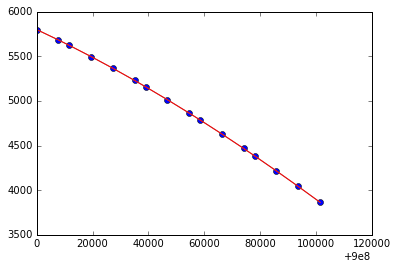

In [41]:
fit.plot()

AttributeError: 'GeneralCableModel' object has no attribute 'remove_background'

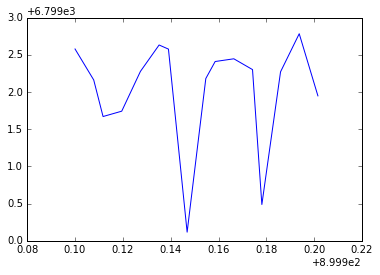

In [42]:
plot(swp.frequency_MHz_stack,np.abs(swp.s21_points))

In [23]:
swp.s21_raw_stack.shape

(16, 2048)

In [24]:
ff = np.abs(np.fft.fft(swp.s21_raw_stack,axis=1))

In [25]:
ff.shape

(16, 2048)

In [26]:
ff

array([[ 13928662.65463056,         0.        ,         0.        , ...,
                0.        ,         0.        ,         0.        ],
       [ 13928921.98547688,         0.        ,         0.        , ...,
                0.        ,         0.        ,         0.        ],
       [ 13927505.23948037,         0.        ,         0.        , ...,
                0.        ,         0.        ,         0.        ],
       ..., 
       [ 13929868.48509005,         0.        ,         0.        , ...,
                0.        ,         0.        ,         0.        ],
       [ 13928601.42179297,         0.        ,         0.        , ...,
                0.        ,         0.        ,         0.        ],
       [ 13928806.17506414,         0.        ,         0.        , ...,
                0.        ,         0.        ,         0.        ]])

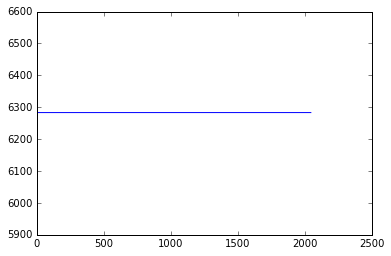

In [27]:
plot(swp.s21_raw_stack[0].imag)

In [28]:
[stream.s21_raw.shape for stream in swp.streams]

[(2048,),
 (2048,),
 (2048,),
 (2048,),
 (2048,),
 (2048,),
 (2048,),
 (2048,),
 (2048,),
 (2048,),
 (2048,),
 (2048,),
 (2048,),
 (2048,),
 (2048,),
 (2048,)]

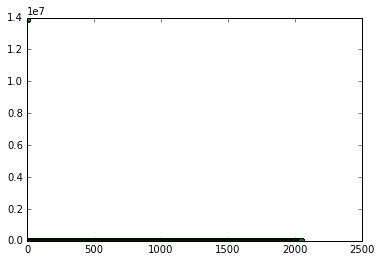

In [29]:
plot((ff.T),'o')